# Role of Features in ML Flukes

In [15]:
%reload_ext watermark
%watermark -uniz --author "Prayson W. Daniel" -vm -p pandas,numpy,matplotlib,scikit-learn,transformers,plotly,jinja2

Author: Prayson W. Daniel

Last updated: 2022-03-21T15:20:40.759393+01:00

Python implementation: CPython
Python version       : 3.8.12
IPython version      : 8.0.1

pandas      : 1.4.0
numpy       : 1.22.2
matplotlib  : 3.5.1
scikit-learn: 1.0.2
transformers: not installed
plotly      : 5.6.0
jinja2      : not installed

Compiler    : GCC 9.3.0
OS          : Linux
Release     : 5.10.16.3-microsoft-standard-WSL2
Machine     : x86_64
Processor   : x86_64
CPU cores   : 12
Architecture: 64bit



In [3]:
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

In [4]:
import numpy as np
import pandas as pd

In [11]:
pd.options.plotting.backend = "plotly"
DATA_URI = "https://raw.githubusercontent.com/AlessandroGianfelici/danish_reviews_dataset/master/raw_data.txt"

In [12]:
dataf = pd.read_csv(DATA_URI, usecols=["review_text", "review_stars"])

with pd.option_context('display.max_colwidth', None):
  display(dataf.sample(3, random_state=666))


,review_text,review_stars
8274,"Lyn hurtigt, effektivt og flot resultat",5
31870,"Selv brændt plastikhår er bedre kvalitet end deres ""ægte luksus remy extensions"".\n\nJeg skriver for at brokke mig, da jeg har været extensions bruger igennem 8 år & kun 1 gang før har oplevet så dårlig kvalitet som denne. Forrige leverandør jeg modtog sending fra beklagede selvfølgelig meget & sendte en ny sending uden beregning, som var langt bedre. \n\nMEN PHURE DERIMOD begynder at skyde skylden på mig, hvordan jeg behandler håret mv. Når jeg pænt forklarer at jeg altså er uddannet frisør, selv har påsat extensions i min frisørsalon & været extensions bruger igennem 8 år & derfor godt ved hvordan man bør passe & pleje extensions, stopper de så med at svare.\n\nJeg kunne inden steder i mine mails finde et ordrenummer jeg kunne referere til heller. Jeg sidder nu med en stor gang plastikkrus, som jeg har betalt 1.200 Kr. for & som jeg hver dag skal bruge oceaner af tid på, for at det kan se nogenlunde anstændigt ud. \n\nVirkelig dårlig service!",1
16862,Fremragende.,5


In [33]:
dict(selector="caption", 
    props=[("text-align", "center"),
    ("font-size", "120%"),
    ("color", 'black')])

{'selector': 'caption',
 'props': [('text-align', 'center'),
  ('font-size', '120%'),
  ('color', 'black')]}

In [63]:
def make_pretty(styler):
    styler.set_caption("Positivity of Danish Reviewers")
    styler.background_gradient(axis=None, vmin=100, vmax=30000, cmap="YlGnBu")
    styler.set_table_styles([
            {'selector': 'th.col_heading', 'props': 'text-align: center;'},
            {'selector': 'th.col_heading.level0', 'props': 'font-size: 1.5em;'},
            {'selector': 'td', 'props': 'text-align: center; font-weight: bold;'},
            {'selector': 'caption',
             'props': 'caption-side: bottom; font-size:0.95em;'},
            ], overwrite=False)
    
    return styler

In [64]:
(
    dataf
     .groupby(by=["review_stars"])
     .nunique()
     .sort_values(by="review_text", ascending=False)
     .rename(columns={"review_text": "Reviews Count"})
     .style.pipe(make_pretty)
)

,Reviews Count
review_stars,
5,27945
1,8437
4,3170
2,1428
3,1172


In [111]:
def highlight_colors(data, color, other_color=None):
    if other_color:
        other_color = f"background-color: {other_color}; opacity: 0.7; font-weight: bold;"
        
    return np.where(data > 3, 
                    f"background-color: {color}; opacity: 0.7; font-weight: bold;" ,
                    other_color)


def sentiment_pretty(styler):
    styler.set_caption("Positive | Negative")
    styler.apply(highlight_colors, 
                 color="green", 
                 other_color="darkred",
                 subset=["review_stars",])

    return styler




(
    dataf
     .assign(sentiment = np.where(dataf["review_stars"].gt(3), 1, 0))
     .sample(10, random_state=42)
     .style.pipe(sentiment_pretty)
)

,review_text,review_stars,sentiment
19150,Dejligt man kan købe den rigtig størrelse når nu ikke de kan købes i butikkerne. Ordrenr. 246172 (Mht gratis kondomer. Så send kun hvis det er samme størrelse som ordre. Ellers er det spild og vil skade miljøet med transport osv mere end de vil gøre gavn),5,1
6194,"nem hjemmeside, gode priser og hurtig levering",5,1
35684,"Har købt nærmest alt indenfor Bitz, da vi synes det er et enormt smukt stel. Men nu var vi oplevet at vores ildfaste fad flækkede efter ovn, altså alm. 200 grader. Fadet flækkede midt over. Burde ikke ske, når det er robust og ildfast. Nu er endnu 2 frokosttallekener også flækket og vi gider simpelthen ikke at købe mere, når det blot flækker af enten ovn eller opvaskemaskine. Super ærgerligt! Men vil absolut ikke anbefale nogen at købe Bitz.",1,0
27361,Det var lige i skabet uden problemer. Super service.,5,1
35906,"På forsiden af ugens reklame kunne man se at der var tilbud på et 40"" Philips TV "" Spar 1000 kr"" "" Max 1 pr. kunde "" I butikken har det fået en anden lyd- nu er besparelsen 300 kr - og ingen begrænsning . Nå, vi fandt et LG 47 tommer til 3899,- . Heldigvis checkede vi Elgigantens hjemmeside . Her kan man få det samme tv for 3500 ,- frit leveret . Vi skulle også kigge på nogle baderumsmøbler . Store plakater med "" 50% rabat på alle baderumsmiljøer "" Ingen af de udstillede modeller var prismærkede , men udstyret med et skilt om at de kun kunne købes på bolkas hjemmeside . Problemet var så at hjemmesiden meddelte at den ikke fungerede pga. opdatering - og man kunne hverken se eller købe baderumsmøbler . På de betingelser kunne de lige så godt slge med 100% rabat . Desværre har vi haft lignende oplevelser med BIlka tidligere - så besøgene er blevet færre med årene . Nu holder de så helt op !!!",2,0
21593,"cpsms.dk leverer virkelig varen til en rigtig god pris. Jeg benyttede også deres kundeservice, hvor der var venlig hjælp og resolut svar på mit spørgsmål. Kan uden forbehold anbefale cpsms.dk.",5,1
26842,Det let at bestille og det hele godkendt inden et døgn om så det var søndag,5,1
14782,Super service og en rigtig god snak,5,1
11878,"God service og hurtig levering, jeg er fuldtilfreds.",5,1
6237,Top glasses fast delivery,5,1


In [112]:
datat = (
            dataf
             .assign(sentiment = np.where(dataf["review_stars"].gt(3), 1, 0))
             # .sample(10, random_state=42)
    )

In [113]:
RANDOM_STATE = 42
(datat
     .assign(sentiment = np.where(dataf["review_stars"].gt(3), 1, 0))
     .sample(100, random_state=RANDOM_STATE)
     .index
)

Int64Index([19150,  6194, 35684, 27361, 35906, 21593, 26842, 14782, 11878,
             6237,  6366,  3933, 29534, 18636, 37134, 24775, 37485, 40922,
             7175, 41691, 27394, 43722, 41440,  9060, 33017, 37800,  6234,
            33131,  6244, 31033, 18094, 18491,   343, 11029, 33301, 19858,
             8541, 33348, 38990, 43832,   884,  2189, 33357, 42644, 11260,
            39990, 32610,  2746, 35265, 23420, 17792,   116, 13267, 42476,
            33393, 23068, 33157, 14600, 42026, 13956, 27984, 18578, 21954,
            12824, 11601, 24128, 31151, 22795, 37287, 14831, 32553, 15220,
            39947, 38222,  5525, 43567, 36585, 29395, 20196, 34174, 16504,
            12006, 23679,  4165,  4859,  3858, 19227, 32277, 23076, 26084,
             1673,  9162, 25704, 43924, 30777, 30827, 40119, 18237, 41948,
            17649],
           dtype='int64')

In [114]:
test_data_index = (datat
     .sample(100, random_state=RANDOM_STATE)
     .index
)

In [115]:
validation_data = datat.loc[test_data_index]

In [116]:
data = datat[~datat.index.isin(test_data_index)]

data.sample(5, random_state=42)

,review_text,review_stars,sentiment
10708,3. gang jeg leaser hos BMC. Intet negativt at ...,5,1
8164,Har ringet til jer 5 gange INDE i telefon tide...,4,1
19599,Vi har aldrig problemer med noget af det YouSe...,5,1
2533,Fuldt ud tilfreds!\n\nJeg har bestilt varer he...,5,1
25833,Vældigt god oplevelse med indlyttende og dygti...,5,1


In [117]:
# We know the data is biased toward positivity. We have to trade carefully
# We could use weighted sample, down sample, up sample or use models that careless about this issue
(
    data[["sentiment"]]
     .value_counts()
     .rename(index ={0: "negative", 1:"positive"})
     .to_frame(name="observations")
     
)

,observations
sentiment,
positive,32958
negative,11027


In [118]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import SGDClassifier

In [120]:
import re
def tokenizer(blob, stop_words=None, remove_digits=True):

    if stop_words is None:
        stop_words = {}
    
    blob = blob.lower()
    
     # eyes [nose] mouth | mouth [nose] eyes pattern
    emoticons = r"(?:[<>]?[:;=8][\-o\*\']?[\)\]\(\[dDpP/\:\}\{@\|\\]|[\)\]\(\[dDpP/\:\}\{@\|\\][\-o\*\']?[:;=8][<>]?)"
    emoticon_re = re.compile(emoticons, re.VERBOSE | re.I | re.UNICODE)
    
    text = re.sub(r'[\W]+', ' ', blob)
    
    # remove 3+ repetitive characters i.e. hellllo -> hello, jaaaa -> jaa 
    repetitions = re.compile(r'(.)\1{2,}')
    text = repetitions.sub(r'\1\1', text)
    
    # remove 2+ repetitive words e.g. hej hej hej -> hej
    
    repetitions = re.compile(r'\b(\w+)\s+(\1\s*)+\b')
    text = repetitions.sub(r'\1 ', text)
    
    
    emoji = ''.join(re.findall(emoticon_re, blob))
    
       
    # remove stopwords
    if stop_words:
        text = [word for word in text.split() if word not in stop_words]
    

    
    if remove_digits:
        text = re.sub(r'\b\d+\b', '', text)
    

    # remove extra spaces
    text = ' '.join(text.split())
    result = f'{text} {emoji}'.encode('utf-8').decode('utf-8')
       
    
    return result.split()

In [227]:
from stopwords import da

In [231]:
# avoids mismatch is Sklearn Pipeline
STOP_WORDS = frozenset(tokenizer(' '.join(word for word in da)))

In [233]:
features = FeatureUnion(
    transformer_list=[("unigram",CountVectorizer(
                        ngram_range=(1, 1),
                        max_features=150000,
                        tokenizer=tokenizer,
                        stop_words=STOP_WORDS
                                ),
                      ),
                      ("bigram",CountVectorizer(
                                    ngram_range=(2, 2),
                                    max_features=150000,
                                    tokenizer=tokenizer,
                                ),
                        ),
                   ("char", CountVectorizer(tokenizer=tokenizer, 
                                 analyzer="char", 
                                 ngram_range=(4, 5))),]
    
    
)



In [171]:
X, y = data["review_text"], data["sentiment"]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=.9, 
                                                    random_state=42, 
                                                    stratify=y
                                                   )

In [172]:
print(f"{color.BOLD}{color.BLUE}Training Data /dɪstrɪˈbjuːʃ(ə)n/{color.END}") 
y_train.value_counts(normalize=True).to_frame().rename(index ={0: "negative", 1:"positive"})

Training Data /dɪstrɪˈbjuːʃ(ə)n/


,sentiment
positive,0.749305
negative,0.250695


In [173]:
print(f"{color.BOLD}{color.BLUE}Test Data /dɪstrɪˈbjuːʃ(ə)n/") 
y_test.value_counts(normalize=True).to_frame().rename(index ={0: "negative", 1:"positive"})

Test Data /dɪstrɪˈbjuːʃ(ə)n/


,sentiment
positive,0.749261
negative,0.250739


In [234]:
# Beauty of Scikit-learn is the easy of 
model = Pipeline(
    [
        ("tranformers", features),
        ("reduce", SelectKBest(chi2, k=15000)),
        ("clf", SGDClassifier(loss="log")),
    ] 
)

In [235]:
%%time
model.fit(X_train, y_train)

CPU times: user 25.6 s, sys: 2.3 s, total: 27.9 s
Wall time: 25.7 s


Pipeline(steps=[('tranformers',
                 FeatureUnion(transformer_list=[('unigram',
                                                 CountVectorizer(max_features=150000,
                                                                 stop_words=frozenset({'a',
                                                                                       'ad',
                                                                                       'af',
                                                                                       'aldrig',
                                                                                       'alene',
                                                                                       'alle',
                                                                                       'allerede',
                                                                                       'alligevel',
                                                         

In [202]:
model.score(X_test, y_test)

0.934985223914526

In [203]:
y_pred = model.predict(X_test)

In [178]:
from sklearn.metrics import ConfusionMatrixDisplay

 Unconfused Confusion Matrix


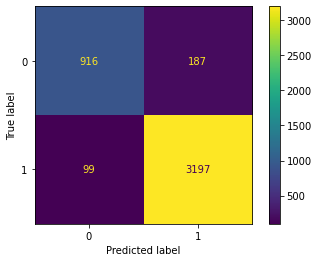

In [204]:
print(f"{color.BOLD}{color.DARKCYAN} Unconfused Confusion Matrix") 
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [180]:
from sklearn.metrics import classification_report

In [205]:
print(f"{color.BOLD}{color.BLUE} ✔️ Classification Report{color.END}{color.GREEN}") 
print(classification_report(y_test, y_pred, target_names=["negative", "positive"]))

 ✔️ Classification Report
              precision    recall  f1-score   support

    negative       0.90      0.83      0.86      1103
    positive       0.94      0.97      0.96      3296

    accuracy                           0.93      4399
   macro avg       0.92      0.90      0.91      4399
weighted avg       0.93      0.93      0.93      4399



In [206]:
(
    validation_data
    .assign(score = lambda d: model.predict(d["review_text"]))
    .sample(10)
)

,review_text,review_stars,sentiment,score
35906,På forsiden af ugens reklame kunne man se at d...,2,0,0
41948,Hej Thomas Cook \nJeg synes ellers i er et god...,2,0,0
11601,Professionel betjening og hurtig levering,5,1,1
9060,"Fantastisk firma, super service, lækkert indpa...",5,1,1
6234,Helt igennem dårlig .\nJeg har returneret vare...,1,0,0
23068,Min cavalier King Charles spaniel har lige fåe...,5,1,1
6366,Der er ikke noget at klage over. Utrolig flink...,5,1,1
24775,Må desværre også melde ind at man skal være yd...,1,0,0
42644,Jeg har uden tvivl mødt de mest omsorgsfulde o...,5,1,1
33301,meget hurtig levering. Produktet (læderforklæd...,5,1,1


In [207]:
(
    validation_data
    .assign(score = lambda d: model.predict(d["review_text"]))
    .loc[lambda d: d["sentiment"].ne(d["score"])]
)

,review_text,review_stars,sentiment,score
19150,Dejligt man kan købe den rigtig størrelse når ...,5,1,0
29534,Pakken kom 1 dag for sent end forventet i følg...,1,0,1
42476,Vurderingsmanden optrådte yderst hensynsfuldt ...,5,1,0
33393,"Prisen er god, og bestilte derfor 2 par sko ti...",1,0,1
13956,"Medarbejderne knokler, der er alt for få til a...",2,0,1
31151,PAS PÅ! Ingen service og svære at komme i kont...,1,0,1
37287,Jeg er fint tilfreds med POWER og deres meget ...,3,0,1
32553,"Manglende udvikling af mobilbank. JyskeBanks ""...",1,0,1
26084,Kørte på motorvejen ved Horsens og fik en fejl...,5,1,0


In [208]:
# looking at the probability of cases it go wrong, we see mostly borderline probabilities
#with to interesting cases lies in borderlines

(
    validation_data
    .assign(score = lambda d: model.predict(d["review_text"]))
    .loc[lambda d: d["sentiment"].ne(d["score"])]
    .assign(score_probability = lambda d: model.predict_proba(d["review_text"])[:, 1])
)

,review_text,review_stars,sentiment,score,score_probability
19150,Dejligt man kan købe den rigtig størrelse når ...,5,1,0,0.001567
29534,Pakken kom 1 dag for sent end forventet i følg...,1,0,1,0.744123
42476,Vurderingsmanden optrådte yderst hensynsfuldt ...,5,1,0,0.003726
33393,"Prisen er god, og bestilte derfor 2 par sko ti...",1,0,1,0.601459
13956,"Medarbejderne knokler, der er alt for få til a...",2,0,1,0.999929
31151,PAS PÅ! Ingen service og svære at komme i kont...,1,0,1,0.951057
37287,Jeg er fint tilfreds med POWER og deres meget ...,3,0,1,0.999998
32553,"Manglende udvikling af mobilbank. JyskeBanks ""...",1,0,1,0.998985
26084,Kørte på motorvejen ved Horsens og fik en fejl...,5,1,0,0.000183


In [209]:
model[:-1].get_feature_names_out()

array(['unigram__00kr', 'unigram__100kr', 'unigram__200kr', ...,
       'char__👎👎👎', 'char__😡😡😡', 'char__😡😡😡😡'], dtype=object)

In [210]:
explain = (
        pd
            .DataFrame({"score":model[-1].coef_[0]},
                       index = model[:-1].get_feature_names_out()
            )
            .sort_values(by="score")
)

In [211]:
explain.tail(5)

,score
unigram__tak,1.357551
char__g go,1.390632
char__ ind,1.466953
bigram__ikke sidste,1.554997
bigram__med det,1.564158


In [212]:
explain.head(5)

,score
char__fup,-1.822989
unigram__ringe,-1.790013
bigram__alt for,-1.704469
bigram__ikke anbefale,-1.647753
char__elen,-1.589517


In [213]:
(
    validation_data
    .assign(score = lambda d: model.predict(d["review_text"]))
    .loc[lambda d: d["sentiment"].ne(d["score"])]
    .assign(score_probability = lambda d: model.predict_proba(d["review_text"])[:, 1])
    .loc[lambda d: (d["score"].eq(0) & d["score_probability"].lt(.4))]
    # .loc[lambda d: (d["score"].eq(1) & d["score_probability"].gt(.6))]
)

,review_text,review_stars,sentiment,score,score_probability
19150,Dejligt man kan købe den rigtig størrelse når ...,5,1,0,0.001567
42476,Vurderingsmanden optrådte yderst hensynsfuldt ...,5,1,0,0.003726
26084,Kørte på motorvejen ved Horsens og fik en fejl...,5,1,0,0.000183


In [214]:
message = (
    validation_data
    .assign(score = lambda d: model.predict(d["review_text"]))
    .loc[lambda d: d["sentiment"].ne(d["score"])]
    .assign(score_probability = lambda d: model.predict_proba(d["review_text"])[:, 1])
    .loc[lambda d: (d["score"].eq(0) & d["score_probability"].lt(.4))]
    # .loc[lambda d: (d["score"].eq(1) & d["score_probability"].gt(.6))]
)["review_text"].squeeze()

In [215]:
message.iloc[0]

'Dejligt man kan købe den rigtig størrelse når nu ikke de kan købes i butikkerne. \nOrdrenr. 246172 (Mht gratis kondomer. Så send kun hvis det er samme størrelse som ordre. Ellers er det spild og vil skade miljøet med transport osv mere end de vil gøre gavn)'

In [216]:
model[:-1].transform(tokenizer(message.iloc[0])).nonzero()[1]

array([  201,  6550,  6551,  7282,  8883,  9922,  9930, 10280,  9337,
         551,  9601,  9603, 14871,  6566,  8883, 12431, 13666,  7356,
        7357, 10015, 12337, 12338, 12557, 13187, 13188, 13871, 13875,
       14956, 14957, 11174,  8908,  8909,  9435,  9337,  6125,  9601,
        9603, 14871,  6235,  6236,  7634,  7637,  8908,  8909,  9401,
        9408,  9435,  9443, 12514, 13671, 13674, 14167, 14168,  6698,
        6704, 11566, 11573, 12275, 12276, 12347,   391,  6001,  6003,
        8432,  8434, 12238, 12240,  6686,  9484, 10352, 10811, 11410,
       11452, 11454,  7469, 12890, 12894,  9575,  8624,  8627, 14354,
        6600,  5777,  5778, 10405, 12825, 12827,  7356,  7357, 10015,
       12337, 12338, 12557, 13187, 13188, 13871, 13875, 14956, 14957,
       13050,   746,  6698, 11566, 11573, 12275, 12276,  7348,  7350,
        7646,  9873,  9881,  9962,  9968,  6600,   964,  8950, 11783,
       11784, 13068, 13069, 14342,   902,  5555,  9326,  9327, 12958,
       12960, 10325,

In [217]:
model[:-1].get_feature_names_out()[model[:-1].transform(tokenizer(message.iloc[0])).nonzero()[1]]

array(['unigram__dejligt', 'char__dej', 'char__dejl', 'char__ejl',
       'char__igt', 'char__lig', 'char__ligt', 'char__man', 'char__kan',
       'unigram__købe', 'char__køb', 'char__købe', 'char__øbe',
       'char__den', 'char__igt', 'char__rig', 'char__tig', 'char__els',
       'char__else', 'char__lse', 'char__rel', 'char__rels', 'char__rre',
       'char__stø', 'char__stør', 'char__tør', 'char__tørr', 'char__ørr',
       'char__ørre', 'char__når', 'char__ikk', 'char__ikke', 'char__kke',
       'char__kan', 'char__bes', 'char__køb', 'char__købe', 'char__øbe',
       'char__but', 'char__buti', 'char__ern', 'char__erne', 'char__ikk',
       'char__ikke', 'char__ker', 'char__kern', 'char__kke', 'char__kker',
       'char__rne', 'char__tik', 'char__tikk', 'char__uti', 'char__utik',
       'char__dre', 'char__dren', 'char__ord', 'char__ordr', 'char__rdr',
       'char__rdre', 'char__ren', 'unigram__gratis', 'char__ati',
       'char__atis', 'char__gra', 'char__grat', 'char__rat', 'char

In [218]:
explain[explain.index.isin(pd.Index(model[:-1].transform(tokenizer(message.iloc[0])).nonzero()[1]))]

,score
